In [1]:
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt

Let's query the Vizier database to retrieve the ZFOURGE data. The ZFOURGE data is split into three fields: CDFS, COSMOS, and UDS. Each field contains multiple catalogs. The catalogs are as follows:

- [J/ApJ/830/51/zf_cdfs](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs) - CDFS photometric catalog (30911 rows)
- [J/ApJ/830/51/zf_cosmos](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cosmos) - COSMOS photometric catalog (20786 rows)
- [J/ApJ/830/51/zf_uds](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_uds) - UDS photometric catalog (22093 rows)
- [J/ApJ/830/51/cdfsz](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfsz) - CDFS EAZY photometric redshift catalog and spectroscopic redshifts (cdfszout and cdfszsp) (30911 rows)
- [J/ApJ/830/51/cdfssfr](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfssfr) - CDFS FAST stellar population catalog and star-formation rates (cdfsfout and cdfs_sfr) (30911 rows)
- [J/ApJ/830/51/cdfsxmatch](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfsxmatch) - CDFS 3D-HST and vdW14 (van der Wel+, 2014ApJ...788...28V) crossmatch and AGN flags (cdfs3dhst, cdfsvdw, and cdfsagn) (30911 rows)
- [J/ApJ/830/51/cdfsflux](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfsflux) - CDFS rest-frame and radio and X-ray fluxes (cdfsrest, cdfsrad, and cdfsx) (30911 rows)
- [J/ApJ/830/51/cdfs_her](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfs_her) - CDFS far-infrared catalog (cdfs.v1.6.9.herschel.v0.4.cat) (30911 rows)
- [J/ApJ/830/51/cosmosz](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosmosz) - COSMOS EAZY photometric redshift catalog and spectroscopic redshifts (cos_zout and coszsp) (20786 rows)
- [J/ApJ/830/51/cosmossfr](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosmossfr) - COSMOS FAST stellar population catalog and star-formation rates (cos_fout and cos_sfr) (20786 rows)
- [J/ApJ/830/51/cosxmatch](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosxmatch) - COSMOS 3D-HST and vdW14 (van der Wel+, 2014ApJ...788...28V) crossmatch and AGN flags (cos3dhst, cosvdw, and cosagn) (Note) (20786 rows)
- [J/ApJ/830/51/cosflux](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosflux) - COSMOS rest-frame and radio and X-ray fluxes (cosrest, cosrad, and cosx) (20786 rows)
- [J/ApJ/830/51/cosmosx](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosmosx) - COSMOS X-ray flux (Note) (20786 rows)
- [J/ApJ/830/51/udsz](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udsz) - UDS EAZY photometric redshift catalog and spectroscopic redshifts (cdfszout and cdfszsp) (22093 rows)
- [J/ApJ/830/51/udssfr](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udssfr) - UDS FAST stellar population catalog and star-formation rates (uds_fout and uds_sfr) (22093 rows)
- [J/ApJ/830/51/udsxmatch](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udsxmatch) - UDS 3D-HST and vdW14 (van der Wel+, 2014ApJ...788...28V) crossmatch and AGN flags (uds3dhst, udsvdw, and udsagn) (22093 rows)
- [J/ApJ/830/51/udsflux](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udsflux) - UDS rest-frame and radio and X-ray fluxes (udsrest, udsrad, and udsx) (22093 rows)

As an example, let's query the CDFS stellar population catalog, which should contain the stellar masses and star-formation rates of the galaxies in the CDFS field.


In [2]:
catalog = "J/ApJ/830/51/cdfssfr"  # Stellar population catalog
columns = ['**']  # Retrieve all columns for this example
result = Vizier(columns=columns, row_limit=-1).query_constraints(catalog=catalog)[0]
data = result.to_pandas()  # Convert to Pandas DataFrame

In [3]:
# Let's inspect the metadata for each column

print("\nMetadata for Each Column:")
for col in result.columns:
    name = col
    description = result[col].description if hasattr(result[col], 'description') else "No description"
    unit = result[col].unit if hasattr(result[col], 'unit') else "No unit"
    print(f"{name}: {description} (Unit: {unit})")


Metadata for Each Column:
recno: Record number assigned by the VizieR team. Should Not be used for identification. (Unit: None)
Seq: [1/30911] Running sequence number (Unit: None)
z: [0.01/9.9]? z_peak (or z_spec if available) (Unit: None)
ltau: [7/11]? Log of timescale {tau} (Unit: log(yr**-1))
Metal: [0.02]? Metallicity (fixed to 0.020) (Unit: )
lage: [7.5/10.1]? Log of age (Unit: log(yr))
Av: [0/4]? Dust reddening (Unit: mag)
lmass: [2.5/14.4]? Log of mass (Unit: log(solMass))
lsfr: [-37.1/4.6]? Log of star formation rate (Unit: log(solMass.yr**-1))
lssfr: [-42.3/-7.4]? Log of specific star formation rate (Unit: log(yr**-1))
la2t: [-3.5/3.1]? log(age/tau) (Unit: None)
chi2: [0.01/386]? minimum {chi}^2^ (Unit: None)
zPk: [0.01/9.9]? Redshift peak (Unit: None)
F24: [-0.4/9.1]? Spitzer/MIPS 24um total flux (Unit: mJy)
e_F24: [/2]? F24 uncertainty (Unit: mJy)
LIR: ? Total integrated IR luminosity (Unit: solLum)
L2800: [0.001/]? 2800{AA} UV luminosity (1) (Unit: solLum)
SFR: [-4287/5074

One of the activities I get new research students to perform is to plot the mass (lmass) vs redshift (zPk). This is a common plot in astronomy and can reveal interesting trends. Let's plot this now for the CDFS catalog.

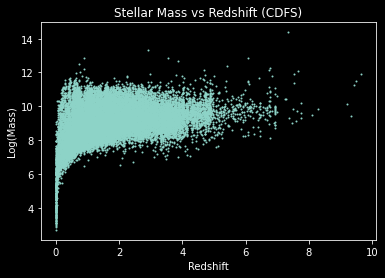

In [4]:
plt.style.use('dark_background')  # Dark theme
plt.scatter(data['zPk'], data['lmass'], s=1)  # Scatter plot
plt.xlabel('Redshift')
plt.ylabel('Log(Mass)')
plt.title('Stellar Mass vs Redshift (CDFS)')
plt.show()

Let's mask the data to ensure we have selected a "standard selection" of galaxies or "use==1" as detailed in the Straatman et al. 2016 paper. The use flag is in the zf_cdfs catalog.

In [5]:
use_catalog = "J/ApJ/830/51/zf_cdfs"  # Use catalog
use_columns = ['Seq', 'use']  # Retrieve the sequence number and use flag
use_result = Vizier(columns=use_columns, row_limit=-1).query_constraints(catalog=use_catalog)[0]
use_data = use_result.to_pandas()

Let's cross-reference the use flag with the CDFS catalog to ensure we are selecting the correct galaxies. We will do this by indexing the dataframes by the sequence number and then joining the two dataframes.

In [6]:
# Set 'Seq' as the index for both dataframes
data = data.set_index('Seq')
use_data = use_data.set_index('Seq')
data = data.join(use_data, how='inner')

With the two dataframes joined, we can now mask the data using the use flag. We will plot the masked data alongside the unmasked data for comparison.

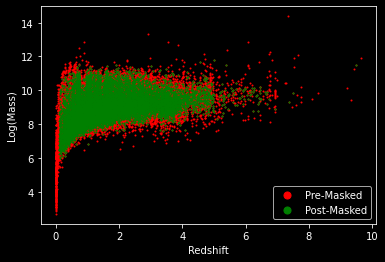

In [7]:
# Mask the data with Use==1 (i.e., standard selection of "good" galaxies)
masked_data = data[data['Use'] == 1]

# We'll also include the pre-masked plot for comparison
plt.scatter(data['zPk'], data['lmass'], s=1, color='red', label='Pre-Masked')
plt.scatter(masked_data['zPk'], masked_data['lmass'], s=1, color='green', label='Post-Masked')
plt.xlabel('Redshift')
plt.ylabel('Log(Mass)')
legend = plt.legend(markerscale=5)  # Adjust marker scale
for handle in legend.legendHandles:
    handle.set_sizes([50])
plt.show()


There you have it! A simple example of querying the Vizier database to retrieve the ZFOURGE data and then masking the data to select a "standard selection" of galaxies. To save frequently downloading the data, you are encouraged to either save your data locally or access the catalogs from the ZFOURGE website https://mjcowley.github.io/zfourge/.